# Deep Neural Network (Feedforward NN, Multi-layers Perceptron)

## DNN 모델로 1차원 x & y 변수 (sin 함수) 모델링 하기 

### Step 1. 데이터 생성

이번에는 조금 다르게 y=sin(x)를 따르는 데이터를 임의로 생성한 후,

Deep Neural Network 모델을 통해 위의 데이터에 가장 적합한 파라미터인 뉴럴 네트워크의 Weights를 찾는 예제 입니다.

이전 예제와 크게 달라진 점은 없고, 생성한 데이터가 sin 함수를 따른다는 것만 차이가 있습니다.

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


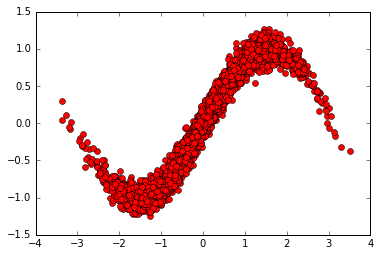

In [1]:
import numpy as np

num_points = 5000
vectors_set = []
for i in range(num_points):
    x1=np.random.normal(.0, 1.0)
    y1=np.sin(x1) + np.random.normal(0.,0.1)
    vectors_set.append([x1,y1])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]


import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'ro')
plt.legend()
plt.show()

### Step 2. 모델 구축

TF를 이용한 구현의 전반적인 프로세스는 모두 동일합니다.
두 번째 단계는 우리가 사용할 Deep Neural Network 모델을 생성하는 것입니다.

우선, 주의할 점이 하나 있습니다!
DNN 계산은 기본적으로 행렬의 곱셈(matmul)을 이용하여 진행됩니다.

하지만 위에서 우리가 생성한 데이터는 rank=1인 리스트입니다.
아래를 먼저 볼까요?

In [2]:
print np.shape(x_data), np.rank(x_data)

(5000,) 1


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  """Entry point for launching an IPython kernel.


행렬의 곱셈을 이용하여 계산을 할 경우 기본적으로, 2차원 이상의 Tensor 형태여야 합니다.
(2차원 이상의 행렬이라고 이해합시다.)

행과 열의 개수가 정확하게 결정되어야, 행렬의 곱셈의 결과값의 크기 역시 결정될 수 있겠죠?

반면, 위의 예는 현재 데이터의 모양이 (5000,)으로 열의 크기가 정해지지 않았습니다.

우선 이 데이터를 2차원으로 바꾸어주겠습니다.

2차원으로 바꾸는 방법은 tf.reshape을 이용하여 직접 모양을 결정하는 방법과

tf.expand_dims를 통해 특정 축을 기준으로 차원을 증가시키는 방법이 있습니다.

주의할 점은 tf 연산을 사용할 경우, 리턴되는 결과 역시 tensorflow의 자료형인 Tensor 자료형이라는 점입니다!

In [3]:
import tensorflow as tf
_x_data = tf.reshape(x_data, [len(x_data),1])
__x_data = tf.expand_dims(x_data,1)
print _x_data
print __x_data

Tensor("Reshape:0", shape=(5000, 1), dtype=float32)
Tensor("ExpandDims:0", shape=(5000, 1), dtype=float32)



본격적으로 Neural Network를 구현해보겠습니다.

우리의 목표는 input(1)-hidden1(5)-hidden2(3)-output(1) 구조의

2개의 hidden layer를 갖는 Deep Neural Network를 구축하는 것입니다.

Neural Network의 구현은 매우 간단한데, tf.Variable을 통해 각 레이어 사이의 Weight Matrix를 선언해주고,

각 Layer의 계산 결과는 이전 Layer와 해당하는 Weight Matrix 사이의 행렬의 곱. 

그리고 Activation 두 단계로 구성된다는 점입니다.


여기에서 학습의 대상은 Weight 들이니, W1, W2, W_out을 각각 [1,5], [5,3], [3,1] 모양의

tf.Variable로 선언하여 모델을 구축해봅시다.

초기값은 -1.0과 1.0 사이의 random uniform으로 설정하겠습니다.

loss, optimizer train 등의 설정은 이전 예제와 완전히 동일합니다!

In [4]:
import tensorflow as tf
x_data = np.expand_dims(x_data,1)
x_data = tf.cast(x_data, 'float32')

W1 = tf.Variable(tf.random_uniform([1,5], -1.0, 1.0), name='W1')
W2 = tf.Variable(tf.random_uniform([5,3], -1.0, 1.0),name='W2')
W_out = tf.Variable(tf.random_uniform([3,1], -1.0, 1.0))

hidden1 = tf.nn.sigmoid(tf.matmul(x_data,W1),name='avt1')
hidden2 = tf.nn.sigmoid(tf.matmul(hidden1,W2))
output = tf.matmul(hidden2, W_out)

loss = tf.reduce_mean(tf.square(output-y_data))
optimizer = tf.train.AdamOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

sess= tf.Session()
sess.run(init)

In [5]:
#Train several steps

for step in range(100):
    sess.run(train)
    print("Step, Loss Value")
    print(step, sess.run(loss))

Step, Loss Value
(0, 0.4544422)
Step, Loss Value
(1, 0.47950339)
Step, Loss Value
(2, 0.46168095)
Step, Loss Value
(3, 0.45106292)
Step, Loss Value
(4, 0.44813916)
Step, Loss Value
(5, 0.44744471)
Step, Loss Value
(6, 0.44700769)
Step, Loss Value
(7, 0.44699684)
Step, Loss Value
(8, 0.44707608)
Step, Loss Value
(9, 0.44708952)
Step, Loss Value
(10, 0.44712427)
Step, Loss Value
(11, 0.4471274)
Step, Loss Value
(12, 0.44714031)
Step, Loss Value
(13, 0.44714984)
Step, Loss Value
(14, 0.44715995)


KeyboardInterrupt: 

In [ ]:
#plt.plot(x_data, y_data, 'ro')
plt.plot(sess.run(x_data)[:], sess.run(output)[:], 'bo')
plt.xlabel('x')
plt.xlim(-4,3)
plt.ylabel('y')
plt.ylim(-1.5,1.5)
plt.legend()
plt.show()

결과가 말도 안되게 좋지 않은 것을 보실 수 있으신....가....요...?
데이터가 있고, DNN을 구축하면 항상 좋은 결과를 주는 것은 아닙니다...

어떤 것이 문제일까요? 파이팅!

### Tensorboard를 통한 Visualization

우리가 만든 모델을 Tensorflow에 내장되어 지원하는 Visualization Software인 Tensorboard를 통해 확인해볼까요?
사용하는 방법은 매우 쉽습니다.
아래와 같이 tf.summary 모듈에 있는 FileWriter를 선언하고
저장하고 싶은 session과 그래프를 지정만 해주면 됩니다.

In [6]:
writer = tf.summary.FileWriter("./DNN_Graph", sess.graph)

Tensorboard의 실행은 주피터가 아닌 터미널 창에서 가능한데요.
터미널에 돌아가서 tensorboard를 아래와 같이 실행만 해주면 됩니다.

tensorboard --logdir('저장되어 있는 디렉토리') 형식으로 명령해주면 localhost를 통해 접속할 수 있습니다

In [ ]:
!tensorboard --logdir='./DNN_Graph' --port=5005

Starting TensorBoard 41 on port 5005
(You can navigate to http://10.10.20.42:5005)
